In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv("Dataset/Salary_dataset.csv")

In [8]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [15]:
df.drop(columns= ['Unnamed: 0'],inplace=True)

In [16]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [19]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, 'Salary')

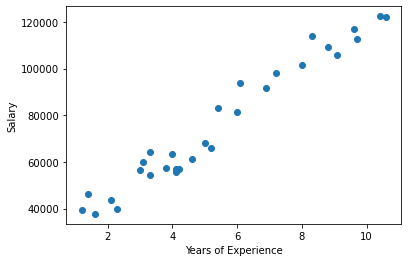

In [25]:
#Scatter plot
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [26]:
#correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


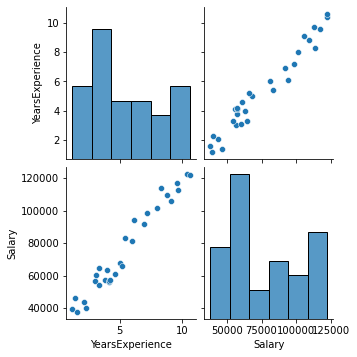

In [27]:
sns.pairplot(df)

In [29]:
#Independent Feature
X = df[["YearsExperience"]]

In [30]:
#dependent Feature
y = df[["Salary"]]

In [34]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [36]:
# Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Apply Learner Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
print(f"Slope:  {model.coef_}")
print(f"Intercept:  {model.intercept_}")

Slope:  [[25083.78871828]]
Intercept:  [72630.63636364]


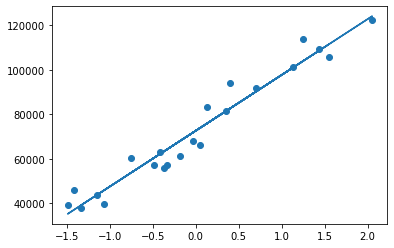

In [71]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

In [72]:
# Predict
y_pred = model.predict(X_test)

In [73]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
MAE = mean_absolute_error(y_test,y_pred)

In [74]:
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)

MSE:  25216353.237768367
RMSE:  5021.588716508787
MAE:  4353.542243046714


In [75]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Number of observations (samples)
n = len(y_test)

# Number of predictors (independent variables)
# Adjust this based on the actual number of features used in your model
p = X_test.shape[1]  # Assuming X_test is the feature set used for prediction

# Calculate adjusted R²
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R²: ", r2)
print("Adjusted R²: ", adjusted_r2)

R²:  0.9678132067461438
Adjusted R²:  0.9624487412038344


In [81]:
# OLS Linear Regression 
import statsmodels.api as sm
model_OLS = sm.OLS(y_train,X_train).fit()

In [82]:
pred = model_OLS.predict(X_test)

In [83]:
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              2.489
Date:                Sat, 06 Jul 2024   Prob (F-statistic):                       0.130
Time:                        12:07:06   Log-Likelihood:                         -277.54
No. Observations:                  22   AIC:                                      557.1
Df Residuals:                      21   BIC:                                      558.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.508e+04   1.59e+04      1.578      0.130   -7982.457    5.82e+04
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.408
Skew:                           0.427   Prob(JB):                        0.495
Kurtosis:                       2.101   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#New Data
new = [[10]]
model.predict(scaler.transform(new))

C:\Users\HW798MH\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[120198.46080208]])